In [1]:
# Allows charts to appear in the notebook
%matplotlib inline

# Libraries for analysis
import numpy as np
import pandas as pd
from sklearn import svm

# Libraries for viz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
# Reading the datasest
recipes = pd.read_csv('recipes_muffins_cupcakes_scones.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [3]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           25 non-null     object
 1   Flour          25 non-null     int64 
 2   Milk           25 non-null     int64 
 3   Sugar          25 non-null     int64 
 4   Butter         25 non-null     int64 
 5   Egg            25 non-null     int64 
 6   Baking Powder  25 non-null     int64 
 7   Vanilla        25 non-null     int64 
 8   Salt           25 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.9+ KB


In [4]:
recipes.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,39.360000,15.920000,23.080000,9.760000,6.960000,2.68000,0.960000,0.960000
std,11.316949,8.174758,14.183089,4.985646,3.713489,3.18486,2.761038,2.009975
min,19.000000,0.000000,3.000000,3.000000,0.000000,0.00000,0.000000,0.000000
25%,34.000000,11.000000,16.000000,6.000000,5.000000,1.00000,0.000000,0.000000
50%,39.000000,17.000000,20.000000,8.000000,6.000000,1.00000,0.000000,0.000000
75%,47.000000,23.000000,26.000000,12.000000,9.000000,2.00000,1.000000,0.000000
max,55.000000,28.000000,52.000000,20.000000,14.000000,11.00000,14.000000,6.000000


In [5]:
# Unique items
recipes['Type'].unique()

array(['Muffin', 'Cupcake', 'Scone'], dtype=object)

In [6]:
# Checking for null values
recipes.isnull().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

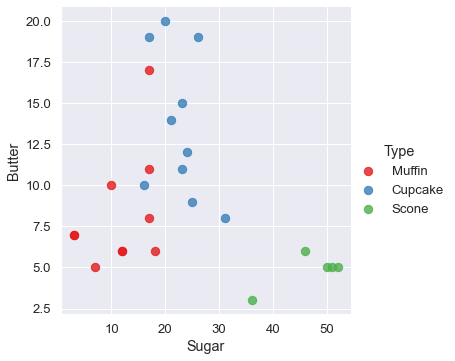

In [7]:
# Plot two ingredients
sns.lmplot(x = 'Sugar', y = 'Butter', data = recipes,
           hue = 'Type', 
           palette='Set1',
           fit_reg=False,
          scatter_kws={'s': 70})

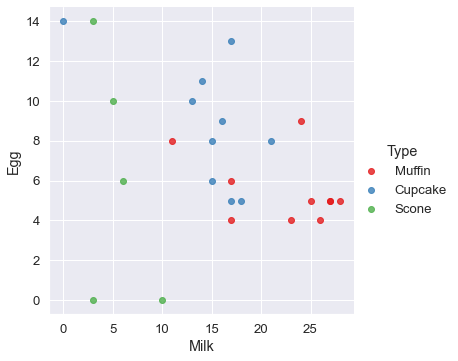

In [8]:
sns.lmplot(x = 'Milk', y = 'Egg', data = recipes, hue = 'Type', fit_reg = False, palette='Set1')

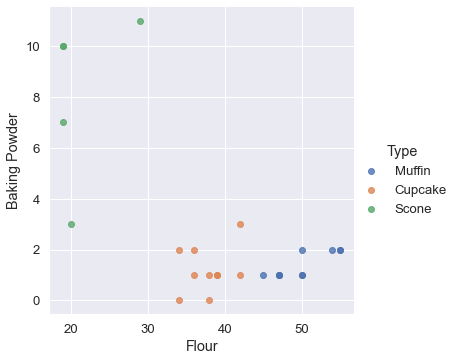

In [9]:
sns.lmplot(x = 'Flour', y = 'Baking Powder', data = recipes, hue = 'Type', fit_reg = False)

<AxesSubplot:>

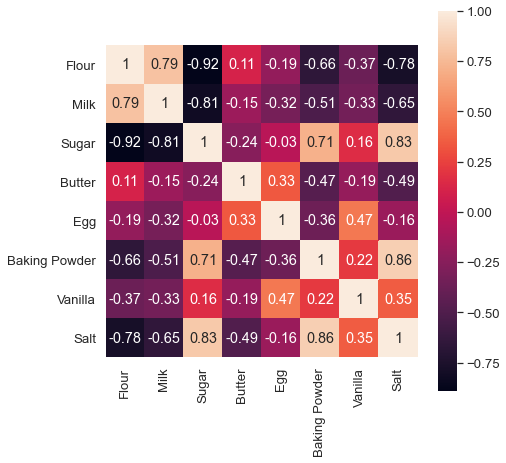

In [10]:
corr = recipes.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(corr, robust =True, square = True, annot = True)

In [13]:
recipes.columns
X = recipes.drop(['Type'], axis = 1)
y = recipes['Type']

In [16]:
from  sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svm = SVC(kernel = 'linear').fit(train_X, train_y)
svm = SVC(kernel = 'rbf').fit(train_X, train_y)

linear_pred = svm.predict(test_X)
rbf_pred = svm.predict(test_X)

print('Accuracy (linear kernal): {:.3f}'.format(accuracy_score(test_y, linear_pred)))
print('Accuracy (rbf kernel): {:.3f}'.format(accuracy_score(test_y, rbf_pred)))

Accuracy (linear kernal): 0.857
Accuracy (rbf kernel): 0.857


(array([3., 0., 0., 0., 0., 3., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

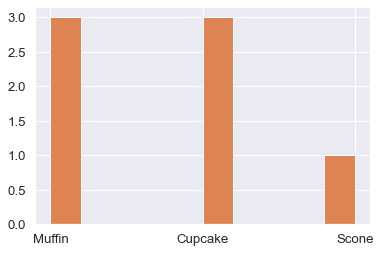

In [25]:
plt.figure()
plt.hist(linear_pred)
plt.hist(rbf_pred)